In [1]:
import torch
import numpy as np

#Datasets & DataLoaders
- Pytorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset`


##Loading a Dataset
- We load the FashionMNIST Dataset.
- `root`: the path where the train/test data is stored
- `train`: specifies training or test dataset.
- `download=True`: downloads the data from the internet if it's not available at `root`.
- `transform` and `target_transform`: specify the feature and label transformations.



In [3]:
import matplotlib.pyplot as plt

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [10]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [8]:
print(training_data[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000

##Iterating and Visualizing the Dataset

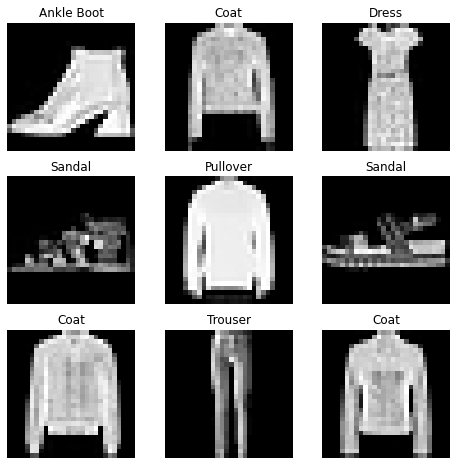

In [9]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


##Creating a Custom Dataset for your files
- you must implement three functions.
    - `__init__`
    - `__len__`
    - `__getitem__`


In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    # instantiating the Dataset object. 
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    # returns the number of samples in out dataset.
    def __len__(self):
        return len(self.img_labels)

    # loads and returns a sample from the dataset at the idx.
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            iabel = self.target_transform(label)
        return image, label

##Preparing your data for training with DataLoaders
- `DataLoader` is an iterable for a mini-batching.

In [11]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

##Iterate through the DataLoader
- `DataLoader` can iterate throguth the dataset as needed.
- Each iteration below returns a batch of `train_features` and `train_labels`. (we specifies `batch_size=64`.)
- Because we specified `shuffle=True`, after we iterate over all batches the data is shuffled.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


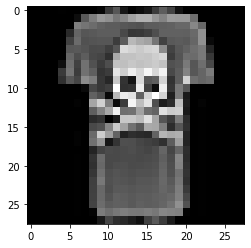

Label: T-Shirt


In [15]:
train_feature, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_feature.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_feature[0].squeeze()
label = train_labels[0].item()
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label]}")